# Analysis Notebook

This notebook is for analysis of the saved data collected using the main_1.ipynb notebook.

In [58]:
# analysis notebook
%reset -f

# autoreload imports
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob
import os
import re

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 
from IPython.display import display
from datetime import datetime
from time import sleep

# import plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

from Visualization.pop_plotting import plot_pop, pop_fit_plot, plot_quad
from Visualization.data_handling import load_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Reading data from Output_data/simu_data_test0.csv
Generating population dynamics plot...


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: title={'center': 'Populations over Time'}, xlabel='Time', ylabel='Population'>,
         <Axes: title={'center': 'Populations over Time'}, xlabel='Time', ylabel='Population'>],
        [<Axes: title={'center': 'Treatment over Time'}, xlabel='Time', ylabel='Dose'>,
         <Axes: title={'center': 'Fitness over Generations'}, xlabel='Generation', ylabel='Fitness'>]],
       dtype=object))

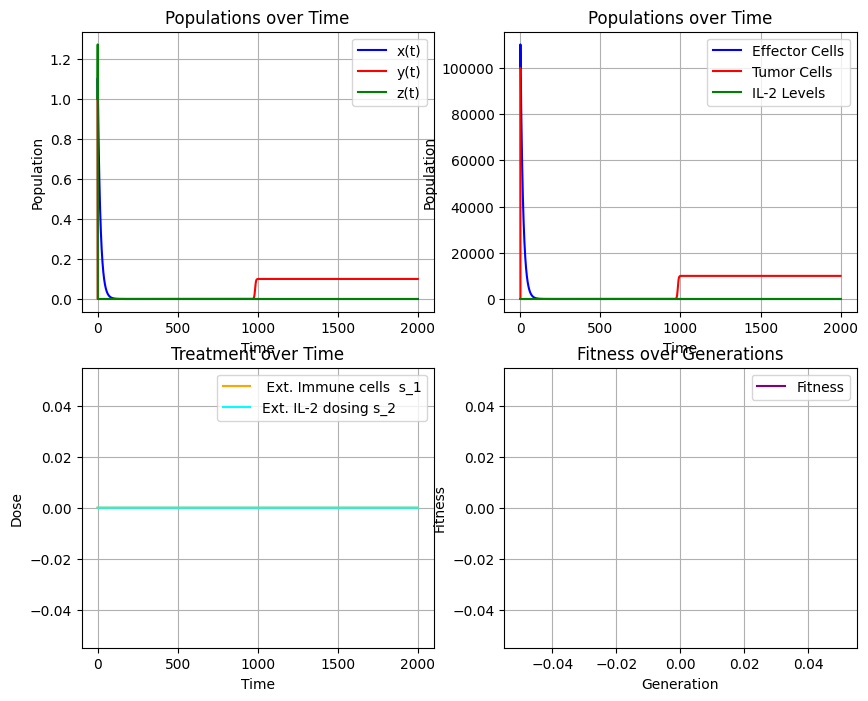

In [59]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test0.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

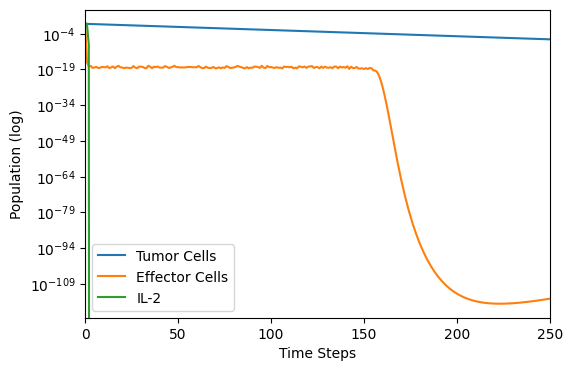

In [60]:
plt.figure(figsize=(6, 4))
plt.plot(t, x, label='Tumor Cells')
plt.plot(t, y, label='Effector Cells')
plt.plot(t, z, label='IL-2')
plt.yscale('log')
plt.xlabel('Time Steps')
plt.ylabel('Population (log)')
plt.xlim(0, 250)
plt.legend()
plt.show()

## Bifurcation analysis

The following code determines and plots these characteristics for each run vs the respective antigenicity value:
1. Amplitude in the last 400 time steps.
2. Maximum y from 400 to 1000.
3. Average y from 500 to 1500.
4. Bifurcation diagram

In [119]:
# get list of files in the output data directory
filepath = glob.glob('Output_data/0001_c_sweep_0/simu_data_0001_c_*_.csv')

print(len(filepath), "files found.")

# function to load data based on antigenicity value
def load_idx1(idx: int):
    path = filepath[idx]

    """
    Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
    """
    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data(path)
    return t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness

# create arrays to hold antigenicity values and corresponding amplitudes
antigenicity_values = np.linspace(-0.005, 0.05, 100)
amplitudes = []
c_vals = []
max_vals = []
ave_vals = []
bifur_c0 = []
bifur_y0 = []

# find amplitudes for each file
for idx, f in enumerate(filepath):
    df = pd.read_csv(f)
    
    y = df["y"].values
    tail = y[-400:]
    amp = tail.max() - tail.min()
    
    center = y[400:1000]
    max_val = center.max()

    center2 = y[500:1500]
    ave_val = center2.mean()

    tail = y[-1000:]
    c_val = antigenicity_values[idx]
    bifur_c0.extend([c_val] * len(tail))
    bifur_y0.extend(tail.tolist())
    
    amplitudes.append(amp)
    c_vals.append(antigenicity_values[idx])
    max_vals.append(max_val)
    ave_vals.append(ave_val)

c_vals_0 = np.array(c_vals)
amplitudes_0 = np.array(amplitudes)
max_0 = np.array(max_vals)
ave_0 = np.array(ave_vals)
bifur_c0 = np.array(bifur_c0)
bifur_y0 = np.array(bifur_y0)


100 files found.


In [120]:
# get list of files in the output data directory
filepath = glob.glob('Output_data/0003_c_sweep_ga_0/simu_data_0003_c_ga_*_.csv')
print(len(filepath), "files found.")

# function to load data based on antigenicity value
def load_idx(idx: int):
    path = filepath[idx]

    """
    Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
    """
    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data(path)
    return t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness

# create arrays to hold antigenicity values and corresponding amplitudes
antigenicity_values = np.linspace(-0.005, 0.05, 100)
amplitudes = []
c_vals = []
max_vals = []
ave_vals = []
bifur_c1 = []
bifur_y1 = []

# find amplitudes for each file
for idx, f in enumerate(filepath):
    df = pd.read_csv(f)
    
    y = df["y"].values
    tail = y[-400:]
    amp = tail.max() - tail.min()

    center = y[400:1000]
    max_val = center.max()

    center2 = y[500:1500]
    ave_val = center2.mean()

    tail = y[-1000:]
    c_val = antigenicity_values[idx]
    bifur_c1.extend([c_val] * len(tail))
    bifur_y1.extend(tail.tolist())
    
    amplitudes.append(amp)
    c_vals.append(antigenicity_values[idx])
    max_vals.append(max_val)
    ave_vals.append(ave_val)

c_vals_1 = np.array(c_vals)
amplitudes_1 = np.array(amplitudes)
max_1 = np.array(max_vals)
ave_1 = np.array(ave_vals)
bifur_c1 = np.array(bifur_c1)
bifur_y1 = np.array(bifur_y1)


100 files found.


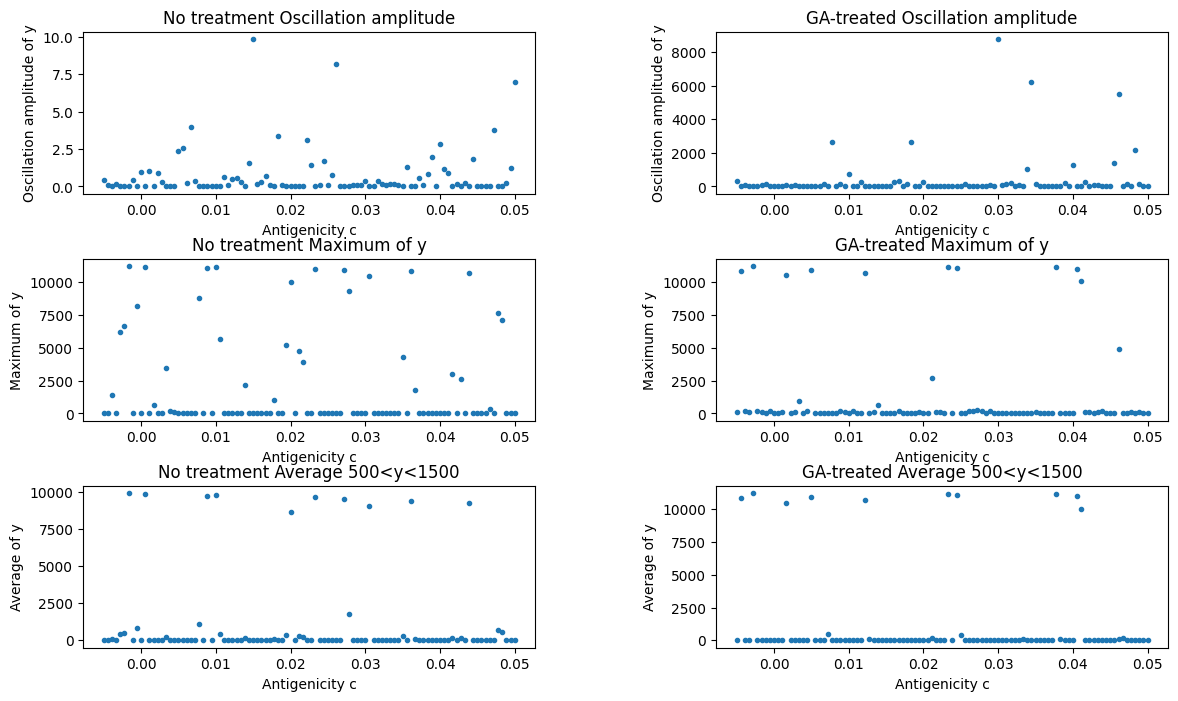

In [121]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3,2,1)
plt.scatter(c_vals_0, amplitudes_0, marker='.', label='No GA, no therapy')
plt.xlabel("Antigenicity c")
plt.ylabel("Oscillation amplitude of y")
plt.title("No treatment Oscillation amplitude")

plt.subplot(3,2,2)
plt.scatter(c_vals_1, amplitudes_1, marker='.', label='With GA, with therapy')
plt.xlabel("Antigenicity c")
plt.ylabel("Oscillation amplitude of y")
plt.title("GA-treated Oscillation amplitude")

plt.subplot(3,2,3)
plt.scatter(c_vals_0, max_0, marker='.', label='No GA, no therapy')
plt.xlabel("Antigenicity c")
plt.ylabel("Maximum of y")
plt.title("No treatment Maximum of y")

plt.subplot(3,2,4)
plt.scatter(c_vals_1, max_1, marker='.', label='With GA, with therapy')
plt.xlabel("Antigenicity c")
plt.ylabel("Maximum of y")
plt.title("GA-treated Maximum of y")

plt.subplot(3,2,5)
plt.scatter(c_vals_0, ave_0, marker='.', label='Average 500<y<1500')
plt.xlabel("Antigenicity c")
plt.ylabel("Average of y")
plt.title("No treatment Average 500<y<1500")

plt.subplot(3,2,6)
plt.scatter(c_vals_1, ave_1, marker='.', label='Average 500<y<1500')
plt.xlabel("Antigenicity c")
plt.ylabel("Average of y")
plt.title("GA-treated Average 500<y<1500")

plt.show()

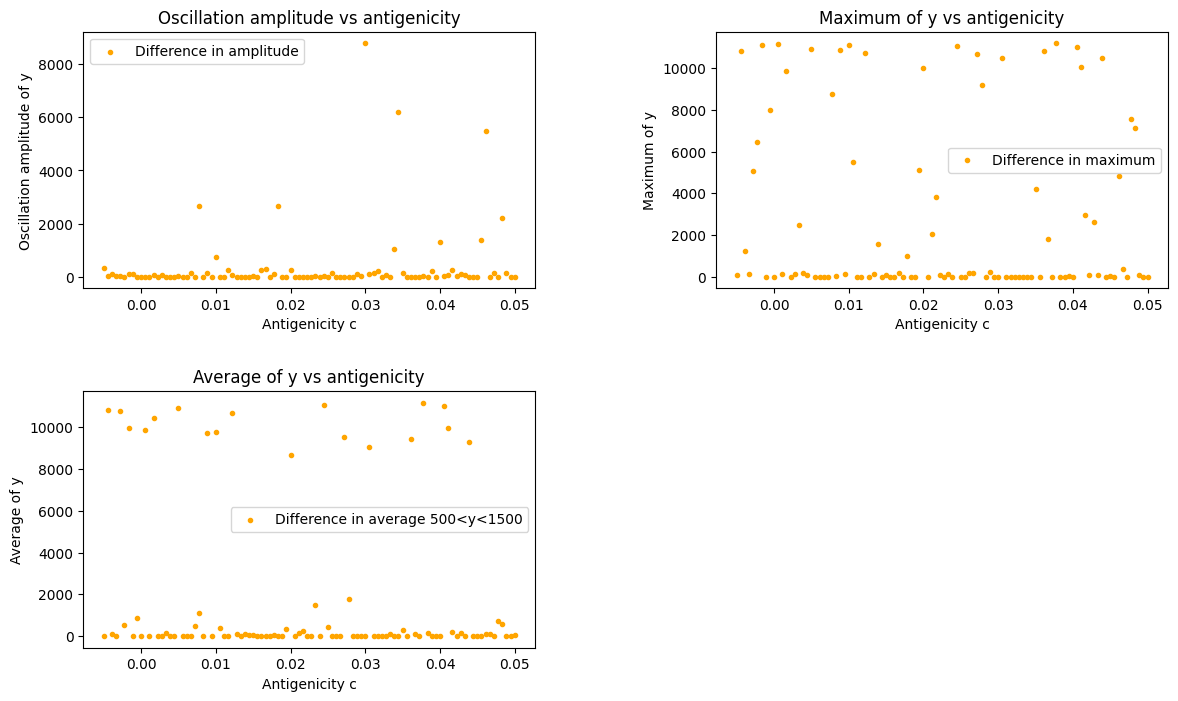

In [122]:
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,2,1)
plt.scatter(c_vals_0, abs(amplitudes_0 - amplitudes_1), marker='.', color='orange', label='Difference in amplitude')
plt.xlabel("Antigenicity c")
plt.ylabel("Oscillation amplitude of y")
plt.title("Oscillation amplitude vs antigenicity")
plt.legend()

plt.subplot(2,2,2)
plt.scatter(c_vals_0, abs(max_0 - max_1), marker='.', color='orange', label='Difference in maximum')
plt.xlabel("Antigenicity c")
plt.ylabel("Maximum of y")
plt.title("Maximum of y vs antigenicity")
plt.legend()

plt.subplot(2,2,3)
plt.scatter(c_vals_0, abs(ave_0 - ave_1), marker='.', color='orange', label='Difference in average 500<y<1500')
plt.xlabel("Antigenicity c")
plt.ylabel("Average of y")
plt.title("Average of y vs antigenicity")
plt.legend()

plt.show()

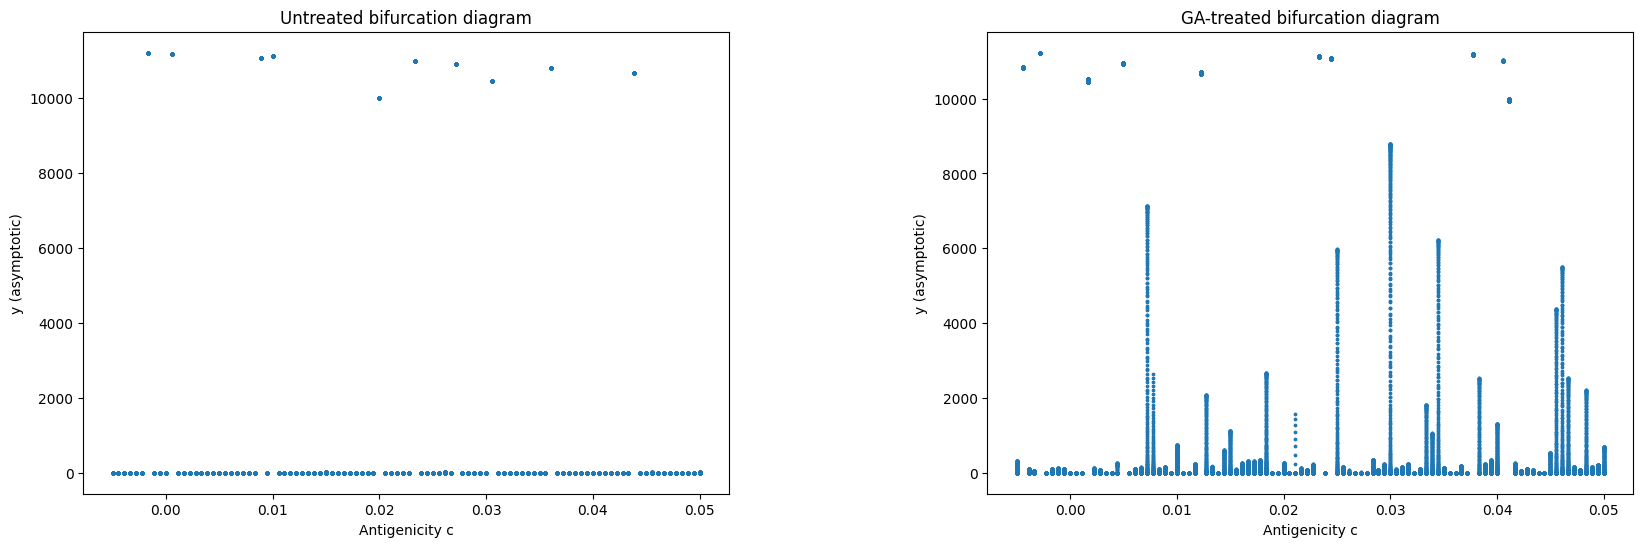

In [123]:

plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.scatter(bifur_c0, bifur_y0, s=3)
plt.xlabel("Antigenicity c")
plt.ylabel("y (asymptotic)")
plt.title("Untreated bifurcation diagram")

plt.subplot(1,2,2)
plt.scatter(bifur_c1, bifur_y1, s=3)
plt.xlabel("Antigenicity c")
plt.ylabel("y (asymptotic)")
plt.title("GA-treated bifurcation diagram")
plt.show()